## Loading libraries

In [485]:
import bamboolib as bam 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix, mean_squared_error
from plotly.subplots import make_subplots
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


## Importing excel data

In [2]:
bikeCrash=pd.read_csv("bike_crash.csv")
bikeCrash.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,Main/Proper Lane,45,Dry,Marked Lanes,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
3,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,Main/Proper Lane,45,Dry,None,Not Worn


In [3]:
bikeCrash

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,Main/Proper Lane,45,Dry,Marked Lanes,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
3,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,Main/Proper Lane,45,Dry,None,Not Worn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,No,No,True,No Data,No,Non-Incapacitating Injury,1254,1,2017,Tuesday,Intersection Related,Main/Proper Lane,40,Dry,Signal Light,Not Worn
2459,No,No,True,No Data,No,Non-Incapacitating Injury,2048,1,2017,Tuesday,Non Intersection,Main/Proper Lane,-1,Dry,Center Stripe/Divider,Not Worn
2460,No,No,True,No Data,No,Not Injured,737,0,2017,Thursday,Intersection Related,Main/Proper Lane,30,Wet,Signal Light,Not Worn
2461,Yes,No,True,No Data,No,Non-Incapacitating Injury,930,1,2017,Friday,Intersection,Main/Proper Lane,-1,Dry,Stop Sign,"Worn, Unk Damage"


No missing values

## Data Cleanup

In [4]:
# Size of the dataset
bikeCrash.shape

(2463, 16)

In [5]:
# data types
bikeCrash.dtypes

$1000 Damage to Any One Person's Property    object
Active School Zone Flag                      object
At Intersection Flag                           bool
Average Daily Traffic Amount                 object
Construction Zone Flag                       object
Crash Severity                               object
Crash Time                                    int64
Crash Total Injury Count                      int64
Crash Year                                    int64
Day of Week                                  object
Intersection Related                         object
Roadway Part                                 object
Speed Limit                                   int64
Surface Condition                            object
Traffic Control Type                         object
Person Helmet                                object
dtype: object

In [6]:
bikeCrash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  2463 non-null   object
 1   Active School Zone Flag                    2463 non-null   object
 2   At Intersection Flag                       2463 non-null   bool  
 3   Average Daily Traffic Amount               2463 non-null   object
 4   Construction Zone Flag                     2463 non-null   object
 5   Crash Severity                             2463 non-null   object
 6   Crash Time                                 2463 non-null   int64 
 7   Crash Total Injury Count                   2463 non-null   int64 
 8   Crash Year                                 2463 non-null   int64 
 9   Day of Week                                2463 non-null   object
 10  Intersection Related                

In [7]:
# columns of the dataset 
bikeCrash.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Average Daily Traffic Amount',
       'Construction Zone Flag', 'Crash Severity', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet'],
      dtype='object')

In [8]:
# Summary of the dataset
bikeCrash.describe()

,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit
count,2463.000000,2463.000000,2463.000000,2463.000000
mean,1404.700771,1.092164,2013.403979,26.410881
std,558.967560,1.208230,2.248480,17.005282
min,1.000000,0.000000,2010.000000,-1.000000
25%,1008.000000,1.000000,2011.000000,0.000000
50%,1532.000000,1.000000,2013.000000,30.000000
75%,1822.500000,1.000000,2015.000000,35.000000
max,2358.000000,15.000000,2017.000000,65.000000


In [9]:
# checking for null data
bikeCrash.isnull().sum()

$1000 Damage to Any One Person's Property    0
Active School Zone Flag                      0
At Intersection Flag                         0
Average Daily Traffic Amount                 0
Construction Zone Flag                       0
Crash Severity                               0
Crash Time                                   0
Crash Total Injury Count                     0
Crash Year                                   0
Day of Week                                  0
Intersection Related                         0
Roadway Part                                 0
Speed Limit                                  0
Surface Condition                            0
Traffic Control Type                         0
Person Helmet                                0
dtype: int64

No null values

In [10]:
# Total number of Unique values 
bikeCrash.nunique()

$1000 Damage to Any One Person's Property      2
Active School Zone Flag                        2
At Intersection Flag                           2
Average Daily Traffic Amount                  81
Construction Zone Flag                         2
Crash Severity                                 5
Crash Time                                   992
Crash Total Injury Count                       7
Crash Year                                     8
Day of Week                                    7
Intersection Related                           5
Roadway Part                                   4
Speed Limit                                   17
Surface Condition                              7
Traffic Control Type                          16
Person Helmet                                  5
dtype: int64

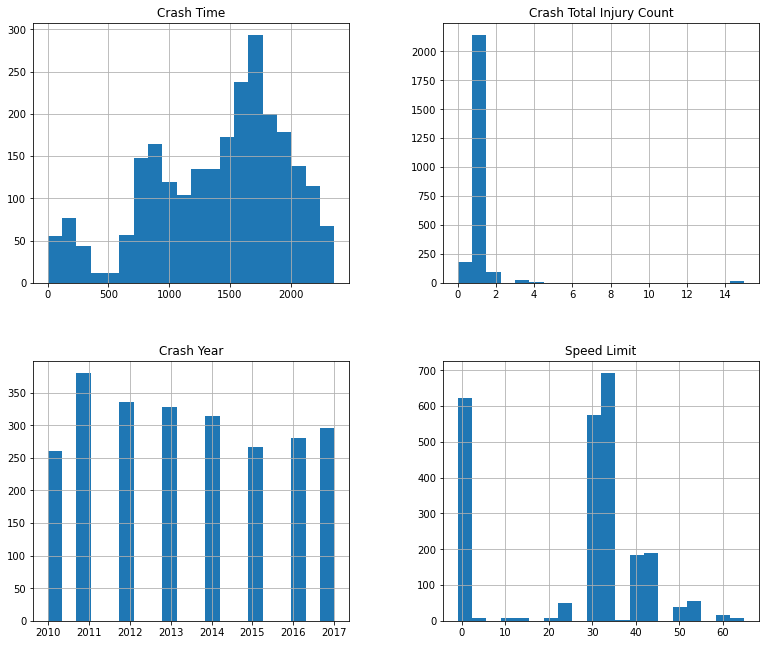

In [11]:
# Histogram of numerical values
bikeCrash.hist(figsize=(13,11),bins=20)
plt.show()

##### There can be row duplicates but in this scenario we need to treat them as new bike crash cases.

Average Daily Traffic Amount and Speed limit misinformation values

Average Daily Traffic Amount has some values as "No Data" which comprises of "85.7% of data".
As most of the data is missing, I decided to remove this column

In [12]:
del bikeCrash["Average Daily Traffic Amount"]
bikeCrash.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet
0,No,No,False,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,Main/Proper Lane,45,Dry,Marked Lanes,"Worn, Damaged"
1,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
2,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
3,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
4,No,No,False,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,Main/Proper Lane,45,Dry,None,Not Worn


Speed Limit has value of ""-1" for "13.9%" of data and value of "0" for "11.3" of data. As the percentage of data with these values aee low, we can replace by the mean of the Speed Limit as it has a normal distribution when 0 and -1 values are taken out. 

In [13]:
# Speed Limit 
# filetring rows with Speed Limit > 0 
speedLimitFilter = bikeCrash.loc[bikeCrash['Speed Limit'] > 0]
# Calculating mean of the speed limit
speedLimitFilter["Speed Limit"].mean()

35.520369364475826

The mean value of speed limit without 0 and -1 values is 35.52. Checking the normal values of Speed Limit, I have decide to round down to 35 to fill the existing values of 0 and -1 with. 

In [14]:
bikeCrash['Speed Limit'] = bikeCrash['Speed Limit'].replace(0, 35)
bikeCrash['Speed Limit'] = bikeCrash['Speed Limit'].replace(-1, 35)

In [15]:
bikeCrash

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet
0,No,No,False,No,Incapacitating Injury,239,1,2010,Friday,Non Intersection,Main/Proper Lane,45,Dry,Marked Lanes,"Worn, Damaged"
1,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
2,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
3,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
4,No,No,False,No,Non-Incapacitating Injury,2300,1,2010,Monday,Intersection Related,Main/Proper Lane,45,Dry,None,Not Worn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,No,No,True,No,Non-Incapacitating Injury,1254,1,2017,Tuesday,Intersection Related,Main/Proper Lane,40,Dry,Signal Light,Not Worn
2459,No,No,True,No,Non-Incapacitating Injury,2048,1,2017,Tuesday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn
2460,No,No,True,No,Not Injured,737,0,2017,Thursday,Intersection Related,Main/Proper Lane,30,Wet,Signal Light,Not Worn
2461,Yes,No,True,No,Non-Incapacitating Injury,930,1,2017,Friday,Intersection,Main/Proper Lane,35,Dry,Stop Sign,"Worn, Unk Damage"


In [16]:
bikeCrash.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag', 'Crash Severity',
       'Crash Time', 'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet'],
      dtype='object')

Adding severity column as a boolean value

In [17]:
bikeCrash['Crash Severity'].unique()

array(['Incapacitating Injury', 'Non-Incapacitating Injury',
       'Possible Injury', 'Not Injured', 'Killed'], dtype=object)

['Incapacitating Injury', 'Possible Injury',  'Killed'] -> severity is 1
['Non-Incapacitating Injury','Not Injured'] -> severity is 0

In [18]:
def categorise(row):  
    if row['Crash Severity'] in 'Incapacitating Injury':
        return 1
    elif row['Crash Severity'] in 'Possible Injury':
        return 1
    elif row['Crash Severity'] in 'Killed':
        return 1
    return 0

bikeCrash['severity'] = bikeCrash.apply(lambda row: categorise(row), axis=1)
del bikeCrash["Crash Severity"]
bikeCrash.tail(10)

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet,severity
2453,Yes,No,True,No,748,1,2017,Thursday,Intersection Related,Main/Proper Lane,35,Dry,Signal Light,Not Worn,1
2454,Yes,No,True,No,1732,1,2017,Thursday,Intersection Related,Main/Proper Lane,35,Dry,None,"Worn, Not Damaged",1
2455,No,No,True,No,1904,1,2017,Friday,Intersection Related,Main/Proper Lane,35,Dry,None,Not Worn,1
2456,No,No,True,No,1930,1,2017,Saturday,Intersection Related,Main/Proper Lane,45,Dry,Signal Light,Not Worn,1
2457,No,No,False,No,1530,1,2017,Monday,Non Intersection,Main/Proper Lane,15,Dry,Marked Lanes,Not Worn,0
2458,No,No,True,No,1254,1,2017,Tuesday,Intersection Related,Main/Proper Lane,40,Dry,Signal Light,Not Worn,0
2459,No,No,True,No,2048,1,2017,Tuesday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn,0
2460,No,No,True,No,737,0,2017,Thursday,Intersection Related,Main/Proper Lane,30,Wet,Signal Light,Not Worn,0
2461,Yes,No,True,No,930,1,2017,Friday,Intersection,Main/Proper Lane,35,Dry,Stop Sign,"Worn, Unk Damage",0
2462,Yes,No,True,No,1802,0,2017,Friday,Intersection,Main/Proper Lane,35,Dry,Marked Lanes,Not Worn,0


In [365]:
# Replacing "Surface Condition" Unknown values with mode of the colun "Dry"
bikeCrash['Surface Condition'] = bikeCrash['Surface Condition'].replace('Unknown', 'Dry')


In [367]:
bikeCrash['Surface Condition'].unique()

array(['Dry', 'Wet', 'Other (Explain In Narrative)', 'Ice',
       'Sand, Mud, Dirt', 'Standing Water'], dtype=object)

## Cattegorical means of the dataset 

In [368]:
bikeCrash.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet',
       'severity'],
      dtype='object')

In [369]:
# $1000 Damage to Any One Person\'s Property 
(bikeCrash.groupby('$1000 Damage to Any One Person\'s Property').mean()).sort_values(by=['severity'], ascending=False)


,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,severity
$1000 Damage to Any One Person's Property,,,,,,
Yes,0.520604,1353.807692,1.413462,2013.559066,35.701923,0.383242
No,0.527378,1426.055331,0.957349,2013.338905,35.257637,0.315274


In [370]:
# Active School Zone Flag
bikeCrash.groupby('Active School Zone Flag').mean().sort_values(by=['severity'], ascending=False)

,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,severity
Active School Zone Flag,,,,,,
No,0.526016,1405.252033,1.092276,2013.404878,35.395528,0.335366
Yes,0.000000,952.666667,1.000000,2012.666667,30.000000,0.333333


In [371]:
# At Intersection Flag
(bikeCrash.groupby('At Intersection Flag').mean()).sort_values(by=['severity'], ascending=False)

,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,severity
At Intersection Flag,,,,,
False,1350.644996,1.211292,2013.325064,35.680068,0.347305
True,1453.534776,0.984544,2013.475270,35.125966,0.324575


In [372]:
# Construction Zone Flag
(bikeCrash.groupby('Construction Zone Flag').mean()).sort_values(by=['severity'], ascending=False)

,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,severity
Construction Zone Flag,,,,,,
No,0.525688,1404.641184,1.094122,2013.413070,35.393753,0.335799
Yes,0.500000,1409.533333,0.933333,2012.666667,35.000000,0.300000


In [373]:
# Crash Year
(bikeCrash.groupby('Crash Year').mean()).sort_values(by=['severity'], ascending=False)

,At Intersection Flag,Crash Time,Crash Total Injury Count,Speed Limit,severity
Crash Year,,,,,
2016,0.565836,1417.099644,0.989324,35.249110,0.398577
2015,0.541353,1436.654135,0.958647,34.687970,0.360902
2017,0.513514,1445.959459,1.020270,35.219595,0.351351
2011,0.526316,1429.581579,1.571053,35.065789,0.350000
2010,0.459770,1339.977011,1.019157,36.417625,0.325670
2014,0.561905,1388.758730,1.009524,35.904762,0.314286
2013,0.509146,1399.448171,1.030488,35.551829,0.310976
2012,0.520833,1374.898810,1.000000,35.133929,0.282738


In [374]:
# Day of Week
(bikeCrash.groupby('Day of Week').mean()).sort_values(by=['severity'], ascending=False)


,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,severity
Day of Week,,,,,,
Wednesday,0.475325,1462.090909,1.561039,2013.407792,34.974026,0.389610
Monday,0.527869,1416.114754,1.003279,2013.462295,34.868852,0.363934
Tuesday,0.587013,1443.353247,0.963636,2013.558442,35.961039,0.355844
Saturday,0.503165,1330.177215,1.022152,2013.278481,35.212025,0.335443
Thursday,0.550964,1448.176309,0.997245,2013.432507,35.426997,0.325069
Friday,0.528736,1430.593103,0.993103,2013.395402,35.508046,0.291954
Sunday,0.492701,1244.288321,1.076642,2013.237226,35.711679,0.281022


In [375]:
# Intersection Related
(bikeCrash.groupby('Intersection Related').mean()).sort_values(by=['severity'], ascending=False)


,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,severity
Intersection Related,,,,,,
Non Intersection,0.043200,1327.931200,1.392000,2013.523200,35.432000,0.376000
Intersection Related,0.699491,1419.213922,1.001698,2013.504244,35.419355,0.336163
Intersection,0.963176,1439.497123,0.989643,2013.192175,34.903337,0.326812
Driveway Access,0.047493,1428.601583,0.976253,2013.546174,36.358839,0.287599
Not Reported,0.000000,1541.000000,0.000000,2010.000000,45.000000,0.000000


In [376]:
# Roadway Part
(bikeCrash.groupby('Roadway Part').mean()).sort_values(by=['severity'], ascending=False)


,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,severity
Roadway Part,,,,,,
Service/Frontage Road,0.459119,1424.012579,0.962264,2013.345912,41.823899,0.408805
Main/Proper Lane,0.560634,1403.595616,1.111940,2013.436101,35.083022,0.330690
Other (Explain In Narrative),0.111111,1399.313725,0.954248,2013.039216,32.941176,0.326797
Entrance/On Ramp,0.285714,1422.285714,1.000000,2012.857143,36.428571,0.285714


In [377]:
# Speed Limit
(bikeCrash.groupby('Speed Limit').mean()).sort_values(by=['severity'], ascending=False)


,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,severity
Speed Limit,,,,,
10,0.333333,1259.000000,0.888889,2013.666667,0.444444
55,0.490909,1309.581818,1.000000,2013.654545,0.400000
60,0.333333,1247.800000,1.000000,2012.066667,0.400000
45,0.447368,1368.015789,0.963158,2013.405263,0.357895
40,0.437838,1428.362162,0.929730,2013.151351,0.356757
50,0.368421,1501.289474,0.894737,2013.447368,0.342105
35,0.537700,1414.086824,1.007616,2013.504189,0.336634
5,0.222222,1546.111111,0.777778,2015.111111,0.333333
25,0.500000,1598.800000,0.860000,2013.820000,0.320000


In [378]:
# Surface Condition
(bikeCrash.groupby('Surface Condition').mean()).sort_values(by=['severity'], ascending=False)


,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,severity
Surface Condition,,,,,,
Other (Explain In Narrative),0.000000,625.000000,1.0000,2013.000000,35.000000,1.000000
Wet,0.480000,1314.846667,2.5600,2013.393333,35.366667,0.453333
Dry,0.529029,1410.517764,0.9974,2013.405113,35.391248,0.327556
Ice,0.000000,1936.000000,1.0000,2011.000000,30.000000,0.000000
"Sand, Mud, Dirt",0.000000,1936.000000,1.0000,2013.000000,30.000000,0.000000
Standing Water,1.000000,1954.000000,0.0000,2016.000000,45.000000,0.000000


In [379]:
# Traffic Control Type
(bikeCrash.groupby('Traffic Control Type').mean()).sort_values(by=['severity'], ascending=False)


,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,severity
Traffic Control Type,,,,,,
Flagman,1.000000,854.000000,1.000000,2010.000000,55.000000,1.000000
Officer,0.666667,795.000000,0.666667,2011.333333,38.333333,0.666667
Signal Light With Red Light Running Camera,0.769231,1314.576923,1.192308,2014.230769,36.730769,0.538462
Yield Sign,0.655172,1331.172414,1.068966,2013.206897,38.448276,0.517241
None,0.168614,1413.131886,1.378965,2013.128548,34.983306,0.365609
Other (Explain In Narrative),0.290323,1363.225806,0.903226,2013.290323,31.612903,0.354839
Flashing Red Light,0.750000,1151.750000,0.833333,2013.000000,33.333333,0.333333
No Passing Zone,0.333333,1869.666667,0.666667,2015.666667,38.333333,0.333333
Warning Sign,0.333333,1135.000000,1.000000,2013.666667,38.333333,0.333333


In [380]:
# Person Helmet
(bikeCrash.groupby('Person Helmet').mean()).sort_values(by=['severity'], ascending=False)


,At Intersection Flag,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,severity
Person Helmet,,,,,,
"Worn, Unk Damage",0.526316,1429.362573,0.988304,2013.888889,35.877193,0.385965
"Worn, Not Damaged",0.601173,1379.222874,0.950147,2013.633431,35.897361,0.343109
Unknown If Worn,0.511211,1439.914798,1.466368,2013.513453,35.168161,0.340807
"Worn, Damaged",0.583893,1344.355705,1.046980,2013.516779,35.704698,0.328859
Not Worn,0.504425,1403.046460,1.022861,2013.236726,35.237463,0.325959


# Outlier

In [381]:
bikeCrash.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet',
       'severity'],
      dtype='object')

In [382]:
bikeCrash.dtypes

$1000 Damage to Any One Person's Property    object
Active School Zone Flag                      object
At Intersection Flag                           bool
Construction Zone Flag                       object
Crash Time                                    int64
Crash Total Injury Count                      int64
Crash Year                                    int64
Day of Week                                  object
Intersection Related                         object
Roadway Part                                 object
Speed Limit                                   int64
Surface Condition                            object
Traffic Control Type                         object
Person Helmet                                object
severity                                      int64
dtype: object

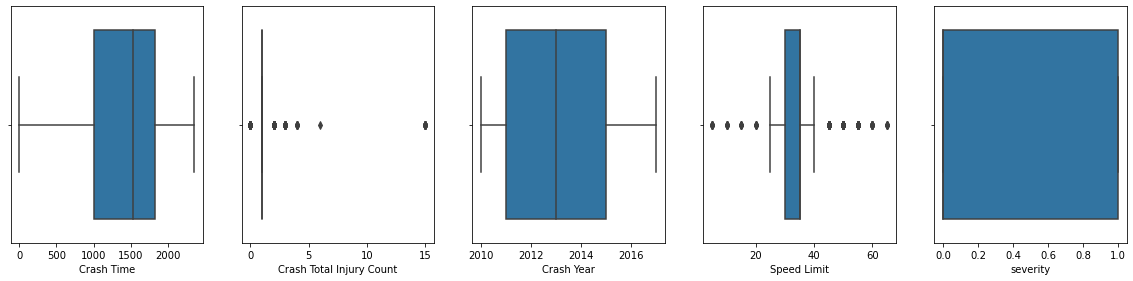

In [383]:
df_describe = bikeCrash.drop(columns = ['$1000 Damage to Any One Person\'s Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag', 'Day of Week',
       'Intersection Related', 'Roadway Part','Surface Condition', 'Traffic Control Type', 'Person Helmet'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

## Data Visulizations

##### Count plots

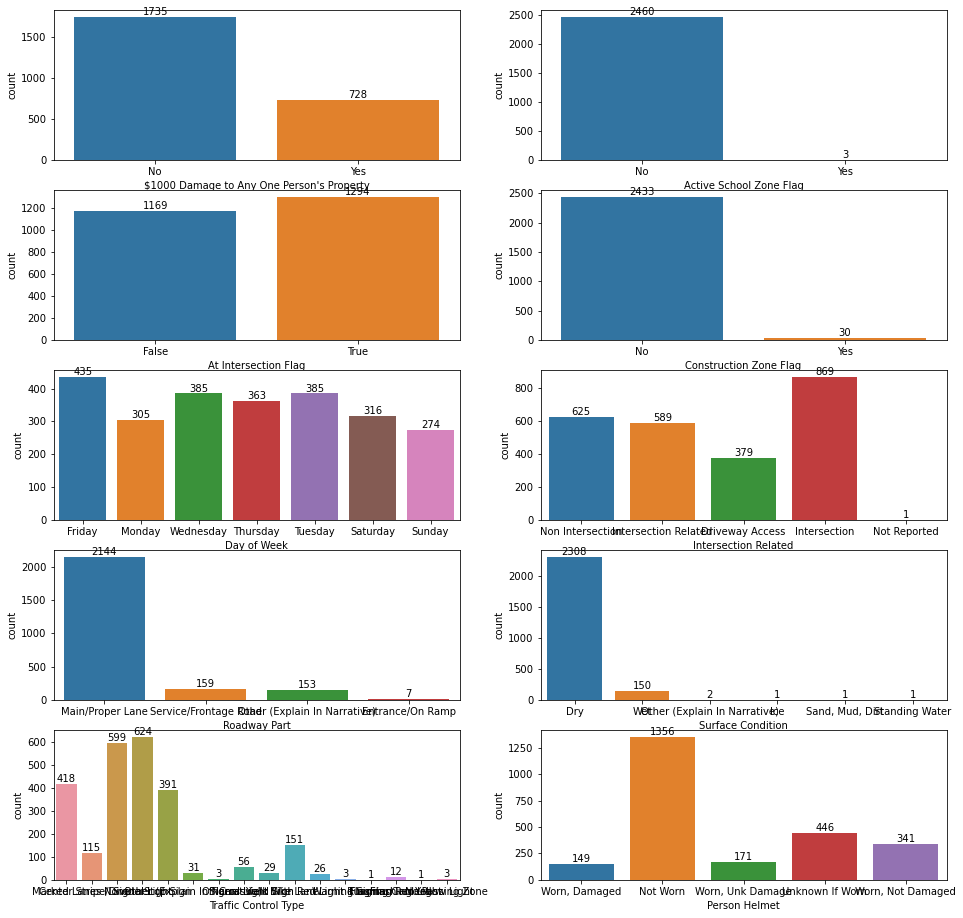

In [384]:
# dataset exploration based on categorical values
fig, ax = plt.subplots(5,2, figsize=(16,16))
a=sns.countplot(data=bikeCrash, x='$1000 Damage to Any One Person\'s Property' , ax=ax[0,0])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Active School Zone Flag' , ax=ax[0,1])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='At Intersection Flag' , ax=ax[1,0])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Construction Zone Flag' , ax=ax[1,1])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Day of Week' , ax=ax[2,0])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Intersection Related' , ax=ax[2,1])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Roadway Part' , ax=ax[3,0])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Surface Condition' , ax=ax[3,1])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Traffic Control Type' , ax=ax[4,0])
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Person Helmet' , ax=ax[4,1])
for container in a.containers:
    a.bar_label(container)

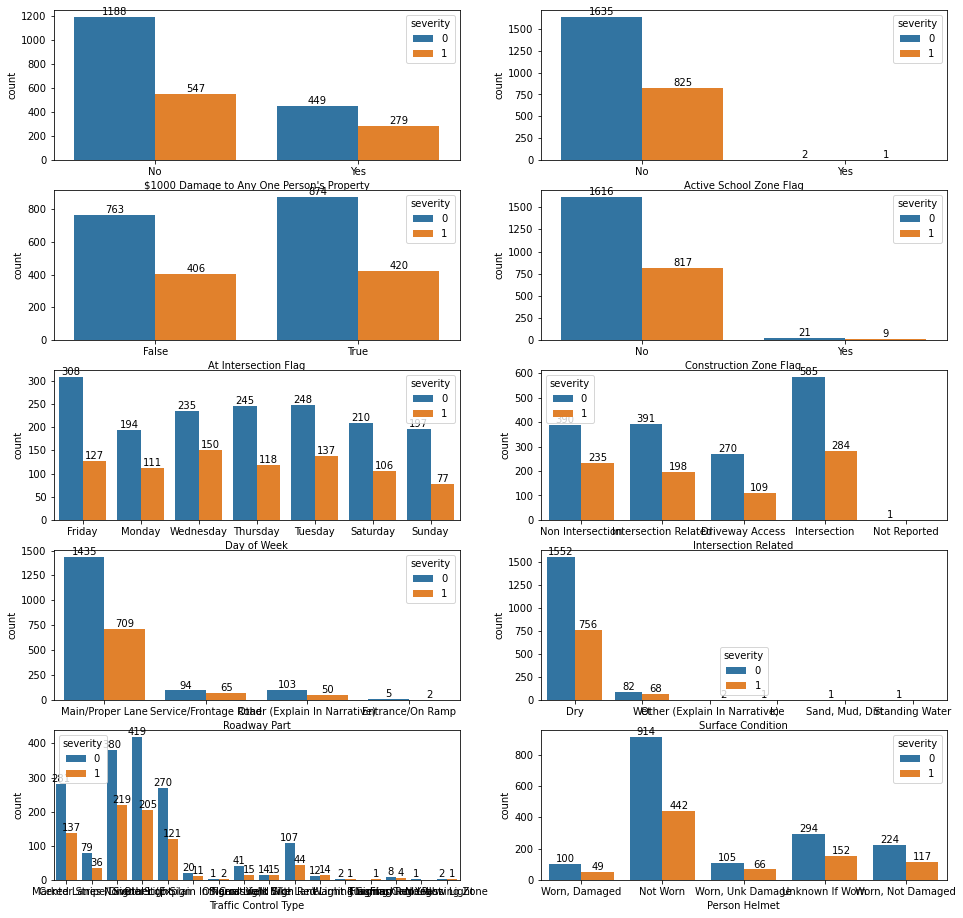

In [385]:
# dataset exploration based on categorical values
fig, ax = plt.subplots(5,2, figsize=(16,16))
a=sns.countplot(data=bikeCrash, x='$1000 Damage to Any One Person\'s Property' , ax=ax[0,0], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Active School Zone Flag' , ax=ax[0,1], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='At Intersection Flag' , ax=ax[1,0], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Construction Zone Flag' , ax=ax[1,1], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Day of Week' , ax=ax[2,0], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Intersection Related' , ax=ax[2,1], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Roadway Part' , ax=ax[3,0], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Surface Condition' , ax=ax[3,1], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Traffic Control Type' , ax=ax[4,0], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=bikeCrash, x='Person Helmet' , ax=ax[4,1], hue='severity')
for container in a.containers:
    a.bar_label(container)

In [386]:
# Tracffic analysis plot 
fig = px.histogram(bikeCrash, x="Traffic Control Type")
fig.show()

## Correlation Analysis

<AxesSubplot:>

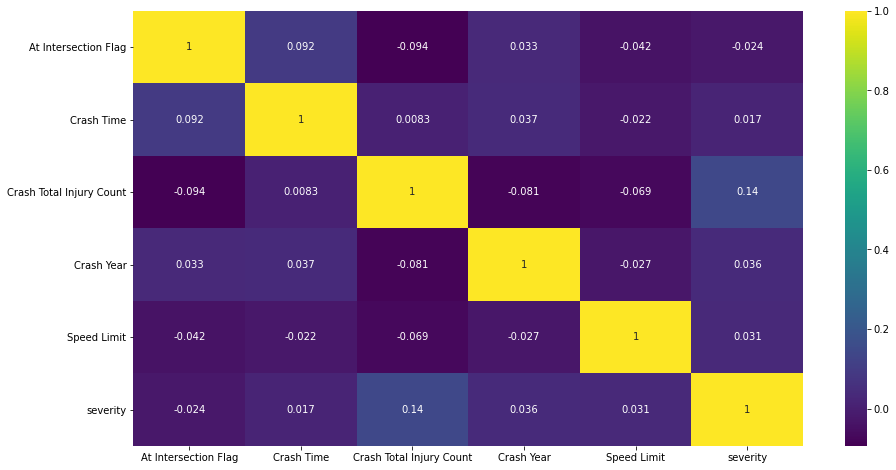

In [387]:
plt.figure(figsize=(15,8))
sns.heatmap(bikeCrash.corr(), annot=True, cmap='viridis')

In [388]:
bikeCrash.columns

Index(['$1000 Damage to Any One Person's Property', 'Active School Zone Flag',
       'At Intersection Flag', 'Construction Zone Flag', 'Crash Time',
       'Crash Total Injury Count', 'Crash Year', 'Day of Week',
       'Intersection Related', 'Roadway Part', 'Speed Limit',
       'Surface Condition', 'Traffic Control Type', 'Person Helmet',
       'severity'],
      dtype='object')

In [389]:
bikeCrash.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Person Helmet,severity
0,No,No,False,No,239,1,2010,Friday,Non Intersection,Main/Proper Lane,45,Dry,Marked Lanes,"Worn, Damaged",1
1,No,No,False,No,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn,0
2,No,No,False,No,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn,0
3,No,No,False,No,310,2,2010,Friday,Non Intersection,Main/Proper Lane,35,Dry,Center Stripe/Divider,Not Worn,0
4,No,No,False,No,2300,1,2010,Monday,Intersection Related,Main/Proper Lane,45,Dry,None,Not Worn,0


In [391]:
# Creating dummy variables for categorical analysis 
bikeCrash_wDummmy = bikeCrash.copy()
bikeCrash_wDummmy=pd.get_dummies(bikeCrash_wDummmy,columns=['$1000 Damage to Any One Person\'s Property',
                                                  'Active School Zone Flag', 
                                                  'At Intersection Flag', 
                                                  'Construction Zone Flag', 
                                                  'Intersection Related',
                                                  'Roadway Part',
                                                  'Surface Condition'
                                                  ])
# Dropping Traffic Control Type and Day of Week as it has a lot of categorical variables
bikeCrash_wDummmy =bikeCrash_wDummmy.drop(['Traffic Control Type','Day of Week', 'Person Helmet'],axis=1)

bikeCrash_wDummmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Crash Time                                      2463 non-null   int64
 1   Crash Total Injury Count                        2463 non-null   int64
 2   Crash Year                                      2463 non-null   int64
 3   Speed Limit                                     2463 non-null   int64
 4   severity                                        2463 non-null   int64
 5   $1000 Damage to Any One Person's Property_No    2463 non-null   uint8
 6   $1000 Damage to Any One Person's Property_Yes   2463 non-null   uint8
 7   Active School Zone Flag_No                      2463 non-null   uint8
 8   Active School Zone Flag_Yes                     2463 non-null   uint8
 9   At Intersection Flag_False                      2463 non-null  

In [392]:
bikeCrash_wDummmy.head()

,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,severity,$1000 Damage to Any One Person's Property_No,$1000 Damage to Any One Person's Property_Yes,Active School Zone Flag_No,Active School Zone Flag_Yes,At Intersection Flag_False,...,Roadway Part_Entrance/On Ramp,Roadway Part_Main/Proper Lane,Roadway Part_Other (Explain In Narrative),Roadway Part_Service/Frontage Road,Surface Condition_Dry,Surface Condition_Ice,Surface Condition_Other (Explain In Narrative),"Surface Condition_Sand, Mud, Dirt",Surface Condition_Standing Water,Surface Condition_Wet
0,239,1,2010,45,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
1,310,2,2010,35,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
2,310,2,2010,35,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
3,310,2,2010,35,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
4,2300,1,2010,45,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0


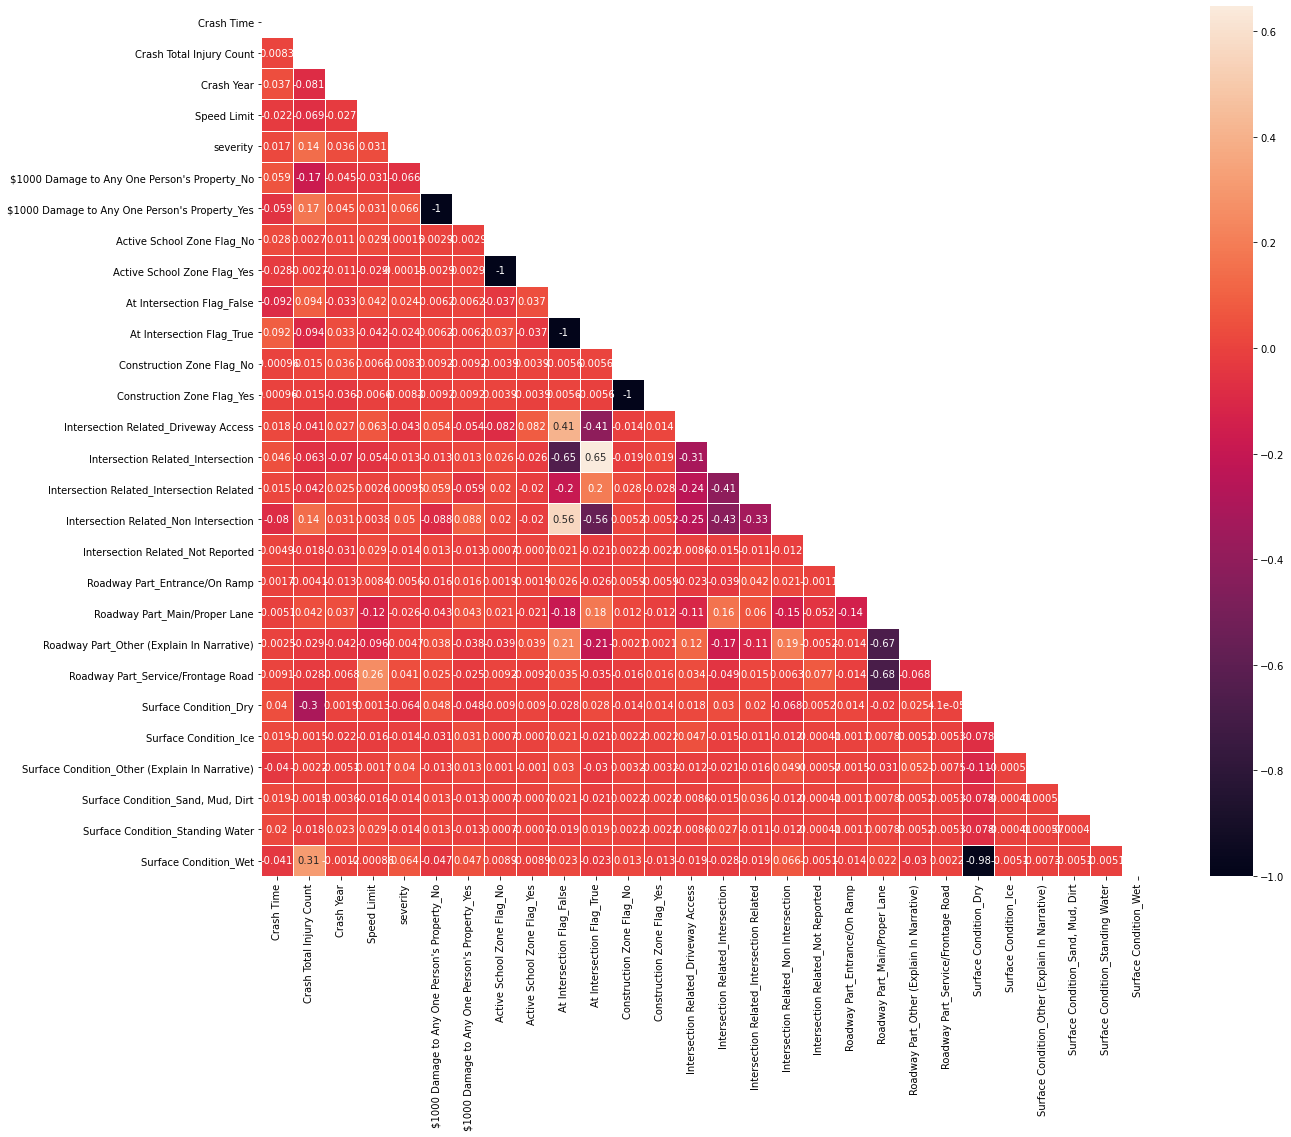

In [393]:
corr=bikeCrash_wDummmy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr, mask=mask, annot=True, linewidths=.8, ax=ax)
plt.show()

In [394]:
#Correlation with independent variable purchase
corr['severity'].sort_values(ascending = False)[1:]


Crash Total Injury Count                          0.143003
$1000 Damage to Any One Person's Property_Yes     0.065691
Surface Condition_Wet                             0.063633
Intersection Related_Non Intersection             0.050192
Roadway Part_Service/Frontage Road                0.040865
Surface Condition_Other (Explain In Narrative)    0.040132
Crash Year                                        0.035697
Speed Limit                                       0.031149
At Intersection Flag_False                        0.024042
Crash Time                                        0.017224
Construction Zone Flag_No                         0.008318
Intersection Related_Intersection Related         0.000950
Active School Zone Flag_No                        0.000150
Active School Zone Flag_Yes                      -0.000150
Roadway Part_Other (Explain In Narrative)        -0.004669
Roadway Part_Entrance/On Ramp                    -0.005614
Construction Zone Flag_Yes                       -0.0083

## Multicolinearity 

In [395]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [396]:
calc_vif(df_describe)

,variables,VIF
0,Crash Time,7.325432
1,Crash Total Injury Count,1.865175
2,Crash Year,38.436360
3,Speed Limit,30.026236
4,severity,1.539147


## 1) Logistic Regression Model

Split dataset into training and testing data 

In [397]:
# 70/30 division of training and test dataset
X_train, X_test, y_train, y_test = train_test_split(bikeCrash_wDummmy.drop('severity',axis=1), 
                                                    bikeCrash_wDummmy['severity'], test_size=0.30, 
                                                    random_state=100)

In [398]:
logit_model1 = LogisticRegression(max_iter=3000)
logit_model1.fit(X_train,y_train)
y_pred = logit_model1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


In [399]:
logit_model_summary=sm.Logit(y_train,X_train)
result=logit_model_summary.fit()
print(result.summary2())

         Current function value: 0.612518
         Iterations: 35
                                                 Results: Logit
Model:                               Logit                           Pseudo R-squared:                0.037     
Dependent Variable:                  severity                        AIC:                             2153.9614 
Date:                                2022-03-13 17:25                BIC:                             2268.4619 
No. Observations:                    1724                            Log-Likelihood:                  -1056.0   
Df Model:                            20                              LL-Null:                         -1096.2   
Df Residuals:                        1703                            LLR p-value:                     3.3290e-09
Converged:                           0.0000                          Scale:                           1.0000    
No. Iterations:                      35.0000                                   

In [400]:
bikeCrash_wDummmy1 =bikeCrash_wDummmy.drop(['$1000 Damage to Any One Person\'s Property_No', 
                                                        'At Intersection Flag_True',
                                                        'Active School Zone Flag_Yes',
                                                        'Intersection Related_Not Reported',
                                                        'Intersection Related_Driveway Access',
                                                        'Roadway Part_Main/Proper Lane',
                                                        'Surface Condition_Dry',
                                                        'Construction Zone Flag_Yes'
                                                        ],axis=1)


In [401]:
calc_vif(bikeCrash_wDummmy1)

,variables,VIF
0,Crash Time,7.494397
1,Crash Total Injury Count,2.154057
2,Crash Year,947.464569
3,Speed Limit,32.726298
4,severity,1.552146
5,$1000 Damage to Any One Person's Property_Yes,1.493531
6,Active School Zone Flag_No,828.930813
7,At Intersection Flag_False,5.988679
8,Construction Zone Flag_No,82.322663
9,Intersection Related_Intersection,7.162943


In [402]:
bikeCrash_wDummmy1 =bikeCrash_wDummmy1.drop(['Crash Year', 
                                                        'Active School Zone Flag_No',
                                                        'Construction Zone Flag_No'
                                                        ],axis=1)


In [403]:
calc_vif(bikeCrash_wDummmy1)

,variables,VIF
0,Crash Time,6.423730
1,Crash Total Injury Count,2.124480
2,Speed Limit,14.568336
3,severity,1.551479
4,$1000 Damage to Any One Person's Property_Yes,1.488949
5,At Intersection Flag_False,4.731365
6,Intersection Related_Intersection,4.882367
7,Intersection Related_Intersection Related,2.892988
8,Intersection Related_Non Intersection,2.503655
9,Roadway Part_Entrance/On Ramp,1.007556


In [404]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(bikeCrash_wDummmy1.drop('severity',axis=1), 
                                                    bikeCrash_wDummmy1['severity'], test_size=0.30, 
                                                    random_state=100)

logit_model_summary1=sm.Logit(y_train1,X_train1)
result=logit_model_summary1.fit()
print(result.summary2())

         Current function value: 0.625595
         Iterations: 35
                                             Results: Logit
Model:                            Logit                         Pseudo R-squared:              0.016    
Dependent Variable:               severity                      AIC:                           2189.0514
Date:                             2022-03-13 17:25              BIC:                           2276.2898
No. Observations:                 1724                          Log-Likelihood:                -1078.5  
Df Model:                         15                            LL-Null:                       -1096.2  
Df Residuals:                     1708                          LLR p-value:                   0.0022051
Converged:                        0.0000                        Scale:                         1.0000   
No. Iterations:                   35.0000                                                               
----------------------------------

In [405]:
%%time
logit_model1_1 = LogisticRegression(max_iter=3000)
logit_model1_1.fit(X_train1,y_train1)
y_pred1 = logit_model1_1.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model1_1.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.66
CPU times: user 215 ms, sys: 7.89 ms, total: 223 ms
Wall time: 58.9 ms


In [406]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79       486
           1       0.54      0.05      0.09       253

    accuracy                           0.66       739
   macro avg       0.60      0.51      0.44       739
weighted avg       0.62      0.66      0.55       739



In [407]:
# Confusion matrix 
confusionMatrix1 = metrics.confusion_matrix(y_test1, y_pred1)
confusionMatrix1

array([[475,  11],
       [240,  13]])

<AxesSubplot:>

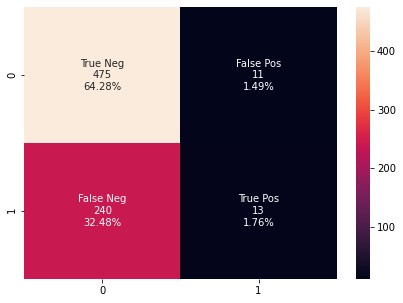

In [408]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusionMatrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusionMatrix1.flatten()/np.sum(confusionMatrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix1, annot=labels, fmt='')

In [409]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Precision:",metrics.precision_score(y_test1, y_pred1))
print("Recall:",metrics.recall_score(y_test1, y_pred1))
print('MSE:',mean_squared_error(y_test1, y_pred1))

Accuracy: 0.6603518267929634
Precision: 0.5416666666666666
Recall: 0.05138339920948617
MSE: 0.33964817320703655


In [444]:
#modelResults
time1 = 103
accuracy1 = 66.03
precision1 = 54.17
recall1 = 5.14
mse1 = 33.96
aic1 = 2189.0514
falsepos1 = 1.49

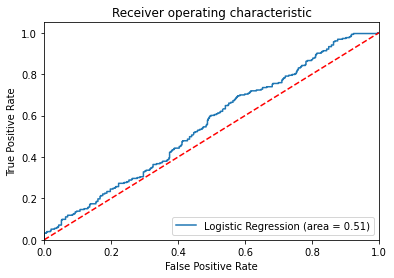

In [411]:
# ROC curve 
logit_roc_auc = roc_auc_score(y_test1, logit_model1_1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, logit_model1_1.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model 2 - Forward Logistic Regression Model using Sequencial Forward Selection (SFS)

## Identifying ideal number of features

In [412]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LogisticRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'neg_mean_squared_error',
           cv = 5)
#Use SFS to select the top 5 features 
sfs.fit(X_train1, y_train1)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)","[-0.33043478260869563, -0.3391304347826087, -0...",-0.328881,"(Crash Total Injury Count,)"
2,"(1, 4)","[-0.33043478260869563, -0.3391304347826087, -0...",-0.328881,"(Crash Total Injury Count, At Intersection Fla..."
3,"(1, 4, 5)","[-0.33043478260869563, -0.3391304347826087, -0...",-0.328881,"(Crash Total Injury Count, At Intersection Fla..."
4,"(1, 3, 4, 5)","[-0.33043478260869563, -0.3391304347826087, -0...",-0.328301,"(Crash Total Injury Count, $1000 Damage to Any..."
5,"(0, 1, 3, 4, 5)","[-0.32753623188405795, -0.33043478260869563, -...",-0.327722,"(Crash Time, Crash Total Injury Count, $1000 D..."
6,"(0, 1, 3, 4, 5, 12)","[-0.32753623188405795, -0.32463768115942027, -...",-0.325982,"(Crash Time, Crash Total Injury Count, $1000 D..."
7,"(0, 1, 3, 4, 5, 6, 12)","[-0.32463768115942027, -0.32753623188405795, -...",-0.326562,"(Crash Time, Crash Total Injury Count, $1000 D..."
8,"(0, 1, 3, 4, 5, 6, 10, 12)","[-0.32463768115942027, -0.33043478260869563, -...",-0.325974,"(Crash Time, Crash Total Injury Count, $1000 D..."
9,"(0, 1, 3, 4, 5, 6, 10, 12, 13)","[-0.32753623188405795, -0.33043478260869563, -...",-0.326554,"(Crash Time, Crash Total Injury Count, $1000 D..."
10,"(0, 1, 3, 4, 5, 6, 7, 10, 12, 13)","[-0.33043478260869563, -0.33043478260869563, -...",-0.325977,"(Crash Time, Crash Total Injury Count, $1000 D..."


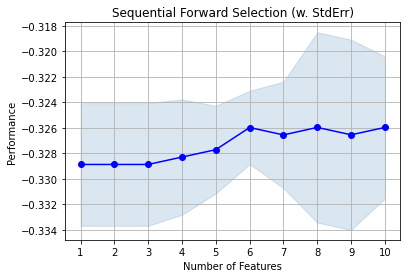

In [413]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [414]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LogisticRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X_train1, y_train1)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)",[-0.48214391310083204],-0.482144,"(Crash Total Injury Count,)"
2,"(1, 15)",[-0.47952990267208273],-0.47953,"(Crash Total Injury Count, Surface Condition_Wet)"
3,"(1, 2, 15)",[-0.47952990267208273],-0.47953,"(Crash Total Injury Count, Speed Limit, Surfac..."
4,"(0, 1, 2, 15)",[-0.4638458400995873],-0.463846,"(Crash Time, Crash Total Injury Count, Speed L..."
5,"(0, 1, 2, 8, 15)",[-0.4638458400995873],-0.463846,"(Crash Time, Crash Total Injury Count, Speed L..."
6,"(0, 1, 2, 3, 8, 15)",[-0.461231829670838],-0.461232,"(Crash Time, Crash Total Injury Count, Speed L..."
7,"(0, 1, 2, 3, 8, 12, 15)",[-0.45861781924208866],-0.458618,"(Crash Time, Crash Total Injury Count, Speed L..."
8,"(0, 1, 2, 3, 8, 11, 12, 15)",[-0.45861781924208866],-0.458618,"(Crash Time, Crash Total Injury Count, Speed L..."
9,"(0, 1, 2, 3, 5, 8, 11, 12, 15)",[-0.45861781924208866],-0.458618,"(Crash Time, Crash Total Injury Count, Speed L..."
10,"(0, 1, 2, 3, 5, 8, 9, 11, 12, 15)",[-0.461231829670838],-0.461232,"(Crash Time, Crash Total Injury Count, Speed L..."


('Crash Time', 'Crash Total Injury Count', 'Speed Limit', "$1000 Damage to Any One Person's Property_Yes", 'Roadway Part_Entrance/On Ramp', 'Surface Condition_Wet')

In [416]:
# Selecting top 6 features as the performance peaks at 5 features from above plot
forwardSelection = bikeCrash_wDummmy1[['Crash Time', 
                                        'Crash Total Injury Count', 
                                        'Speed Limit', 
                                        "$1000 Damage to Any One Person's Property_Yes", 
                                        'Roadway Part_Entrance/On Ramp', 
                                        'Surface Condition_Wet',
                                       'severity']]

In [417]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(forwardSelection.drop('severity',axis=1), 
                                                    forwardSelection['severity'], test_size=0.30, 
                                                    random_state=100)

logit_model_summary2=sm.Logit(y_train2,X_train2)
result=logit_model_summary2.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.630562
         Iterations 6
                                       Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.008    
Dependent Variable:            severity                  AIC:                       2186.1764
Date:                          2022-03-13 17:32          BIC:                       2218.8908
No. Observations:              1724                      Log-Likelihood:            -1087.1  
Df Model:                      5                         LL-Null:                   -1096.2  
Df Residuals:                  1718                      LLR p-value:               0.0026981
Converged:                     1.0000                    Scale:                     1.0000   
No. Iterations:                6.0000                                                        
--------------------------------------------------------------------------------------------

In [418]:
%%time
logit_model1_2 = LogisticRegression(max_iter=3000)
logit_model1_2.fit(X_train2,y_train2)
y_pred2 = logit_model1_2.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model1_2.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.67
CPU times: user 146 ms, sys: 6.51 ms, total: 152 ms
Wall time: 42.5 ms


In [420]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.98      0.79       486
           1       0.64      0.06      0.10       253

    accuracy                           0.67       739
   macro avg       0.65      0.52      0.45       739
weighted avg       0.66      0.67      0.56       739



<AxesSubplot:>

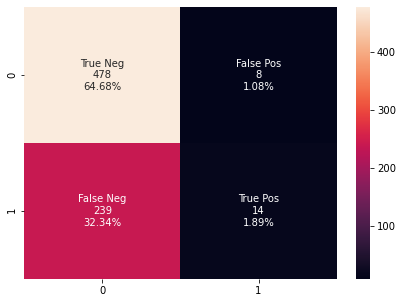

In [421]:
# Confusion matrix 
confusionMatrix2 = metrics.confusion_matrix(y_test2, y_pred2)

fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusionMatrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusionMatrix2.flatten()/np.sum(confusionMatrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix2, annot=labels, fmt='')

In [422]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Precision:",metrics.precision_score(y_test2, y_pred2))
print("Recall:",metrics.recall_score(y_test2, y_pred2))
print('MSE:',mean_squared_error(y_test2, y_pred2))

Accuracy: 0.6657645466847091
Precision: 0.6363636363636364
Recall: 0.05533596837944664
MSE: 0.3342354533152909


In [443]:
#modelResults
time2 = 42.5
accuracy2 = 66.58
precision2 = 63.64
recall2 = 5.53
mse2 = 33.42
aic2 = 2186.1764
falsepos2 = 1.08

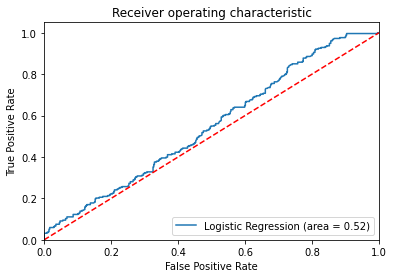

In [424]:
# ROC curve 
logit_roc_auc = roc_auc_score(y_test2, logit_model1_2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test2, logit_model1_2.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Model 3: Backward Feature Elimination using Recursive Feature Elimination for Logistic Regression

In [425]:
#Define RFE 
rfe = RFE(logit_model1_1, 5)
#Use RFE to select the top 5 features 
fit = rfe.fit(X_train1, y_train1)

In [426]:
#Create a dataframe for the results 
df_RFE_results = []
for i in range(X_train1.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': X_train1.columns[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results = df_RFE_results.reset_index()
df_RFE_results

,Columns,Feature_names,Selected,RFE_ranking
0,0,Crash Time,False,12
1,1,Crash Total Injury Count,True,1
2,2,Speed Limit,False,11
3,3,$1000 Damage to Any One Person's Property_Yes,False,2
4,4,At Intersection Flag_False,False,8
5,5,Intersection Related_Intersection,False,6
6,6,Intersection Related_Intersection Related,False,5
7,7,Intersection Related_Non Intersection,False,4
8,8,Roadway Part_Entrance/On Ramp,False,9
9,9,Roadway Part_Other (Explain In Narrative),False,10


In [429]:
# Logistic Regression with only the top 10 features from forward selection
backwardSelection = bikeCrash_wDummmy1[['Crash Total Injury Count',
                                        'Roadway Part_Service/Frontage Road',
                                        'Surface Condition_Ice',
                                      'Surface Condition_Other (Explain In Narrative)', 
                                        'Surface Condition_Wet',
                                      'severity']]


In [431]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(backwardSelection.drop('severity',axis=1), 
                                                    backwardSelection['severity'], test_size=0.30, 
                                                    random_state=100)

logit_model_summary3=sm.Logit(y_train3,X_train3)
result=logit_model_summary3.fit()
print(result.summary2())

         Current function value: 0.679900
         Iterations: 35
                                             Results: Logit
Model:                            Logit                         Pseudo R-squared:              -0.069   
Dependent Variable:               severity                      AIC:                           2354.2947
Date:                             2022-03-13 17:47              BIC:                           2381.5567
No. Observations:                 1724                          Log-Likelihood:                -1172.1  
Df Model:                         4                             LL-Null:                       -1096.2  
Df Residuals:                     1719                          LLR p-value:                   1.0000   
Converged:                        0.0000                        Scale:                         1.0000   
No. Iterations:                   35.0000                                                               
----------------------------------

In [432]:
%%time
logit_model3 = LogisticRegression(max_iter=3000)
logit_model3.fit(X_train3,y_train3)
y_pred3 = logit_model3.predict(X_test3)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logit_model3.score(X_test3, y_test3)))

Accuracy of logistic regression classifier on test set: 0.66
CPU times: user 36.4 ms, sys: 5.8 ms, total: 42.2 ms
Wall time: 40.4 ms


In [433]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79       486
           1       0.57      0.05      0.09       253

    accuracy                           0.66       739
   macro avg       0.62      0.52      0.44       739
weighted avg       0.63      0.66      0.55       739



<AxesSubplot:>

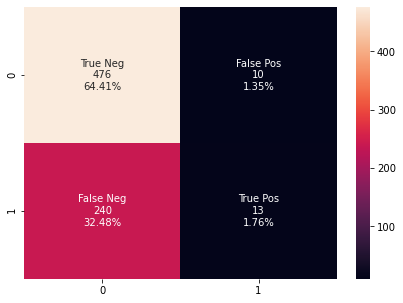

In [434]:
# Confusion matrix 
confusionMatrix3 = metrics.confusion_matrix(y_test3, y_pred3)

fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusionMatrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusionMatrix3.flatten()/np.sum(confusionMatrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix3, annot=labels, fmt='')

In [435]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))
print("Precision:",metrics.precision_score(y_test3, y_pred3))
print("Recall:",metrics.recall_score(y_test3, y_pred3))
print('MSE:',mean_squared_error(y_test3, y_pred3))

Accuracy: 0.6617050067658998
Precision: 0.5652173913043478
Recall: 0.05138339920948617
MSE: 0.3382949932341001


In [442]:
#modelResults
time3 = 40.4
accuracy3 = 66.17
precision3 = 56.52
recall3 = 5.13
mse3 = 33.82
aic3 = 2354.2947
falsepos3 = 1.35

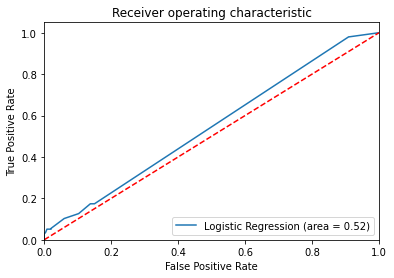

In [439]:
# ROC curve 
logit_roc_auc = roc_auc_score(y_test3, logit_model3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test3, logit_model3.predict_proba(X_test3)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Model 4: Decision Tree

In [446]:
%%time
dt4 = DecisionTreeClassifier(max_depth=4)
dt4.fit(X_train1,y_train1)

CPU times: user 5.13 ms, sys: 11.2 ms, total: 16.4 ms
Wall time: 14.4 ms


DecisionTreeClassifier(max_depth=4)

In [447]:
y_pred4 = dt4.predict(X_test1)
print(confusion_matrix(y_test1, dt4.predict(X_test1)))

[[486   0]
 [246   7]]


<AxesSubplot:>

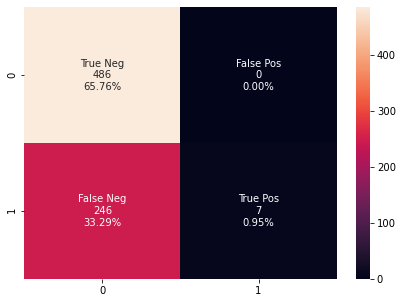

In [449]:
# Confusion Matrix
confusionMatrix4 = metrics.confusion_matrix(y_test1, y_pred4)

fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusionMatrix4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusionMatrix4.flatten()/np.sum(confusionMatrix4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix4, annot=labels, fmt='')

In [450]:
print('Accuracy: '+str(round(accuracy_score(y_test1, y_pred4)*100,2))+'%')
print('Precision: '+str(round(precision_score(y_test1, y_pred4)*100,2))+'%')
print('Recall: '+str(round(recall_score(y_test1, y_pred4)*100,2))+'%')
print('MSE: '+str(round(mean_squared_error(y_test1, y_pred4)*100,2))+'%')

Accuracy: 66.71%
Precision: 100.0%
Recall: 2.77%
MSE: 33.29%


In [451]:
#modelResults
time4 = 14.4
accuracy4 = 66.71
precision4 = 100
recall4 = 2.77
mse4 = 33.29
aic4 = 'NA'
falsepos4 = 0

In [452]:
# Feature importance
feature_names = (bikeCrash_wDummmy1.drop('severity',axis=1).columns)
feature_importance = pd.DataFrame(dt4.feature_importances_, index= feature_names)
feature_importance = feature_importance.reset_index()
feature_importance.columns = [str(column) for column in feature_importance.columns]
feature_importance

,index,0
0,Crash Time,0.154029
1,Crash Total Injury Count,0.592315
2,Speed Limit,0.021289
3,$1000 Damage to Any One Person's Property_Yes,0.036385
4,At Intersection Flag_False,0.000000
5,Intersection Related_Intersection,0.000000
6,Intersection Related_Intersection Related,0.000000
7,Intersection Related_Non Intersection,0.050691
8,Roadway Part_Entrance/On Ramp,0.000000
9,Roadway Part_Other (Explain In Narrative),0.000000


In [453]:
features = (feature_importance.loc[feature_importance['0'] > 0]).sort_values(by=['0'])
features

,index,0
2,Speed Limit,0.021289
3,$1000 Damage to Any One Person's Property_Yes,0.036385
7,Intersection Related_Non Intersection,0.050691
10,Roadway Part_Service/Frontage Road,0.145291
0,Crash Time,0.154029
1,Crash Total Injury Count,0.592315


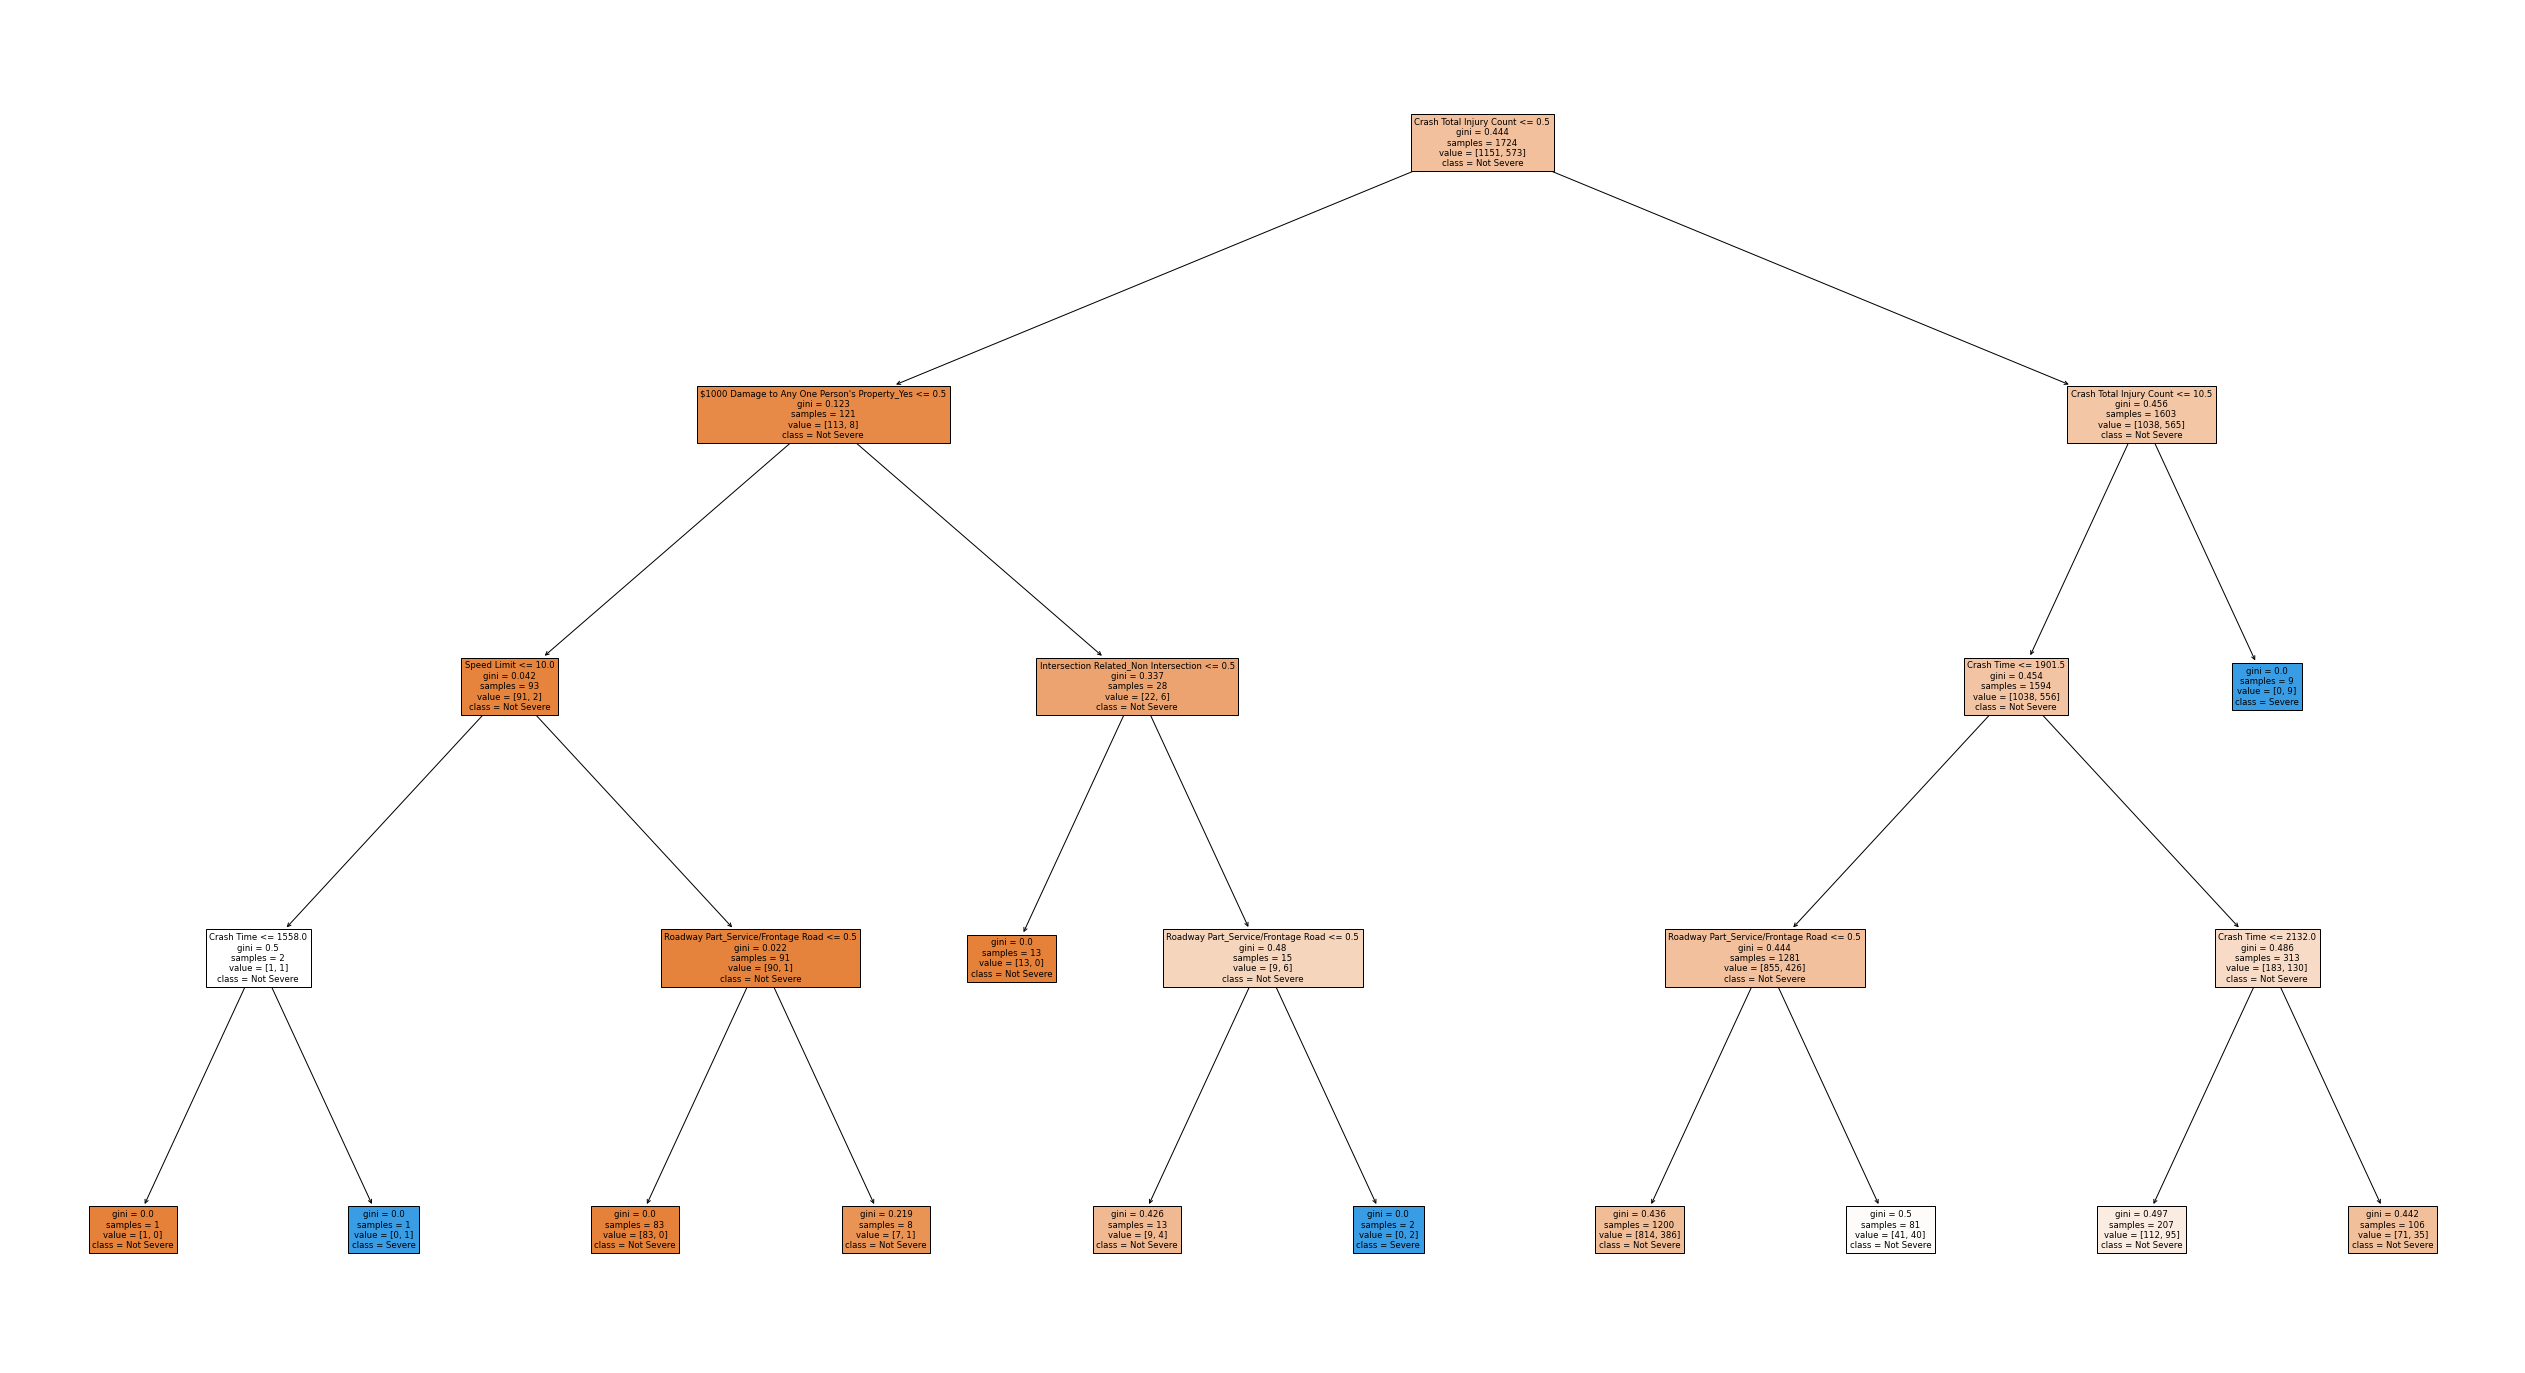

In [454]:
fig = plt.figure(figsize=(45,25))
_ = tree.plot_tree(dt4, 
                   feature_names=feature_names,  
                   class_names={0:'Not Severe',1:'Severe'},
                   filled=True)

In [455]:
print("Classification report - \n", classification_report(y_test1,y_pred4))

Classification report - 
               precision    recall  f1-score   support

           0       0.66      1.00      0.80       486
           1       1.00      0.03      0.05       253

    accuracy                           0.67       739
   macro avg       0.83      0.51      0.43       739
weighted avg       0.78      0.67      0.54       739



Feature: 0, Score: 0.15403
Feature: 1, Score: 0.59232
Feature: 2, Score: 0.02129
Feature: 3, Score: 0.03638
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.05069
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.14529
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000


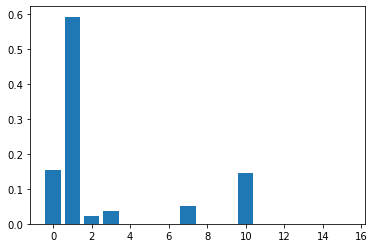

In [456]:
# get importance
importance = dt4.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Ramdom forest

In [471]:
# splitting the data for random forest
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(bikeCrash_wDummmy1.drop('severity',axis=1), 
                                                    bikeCrash_wDummmy1['severity'], test_size=0.30, 
                                                    random_state=101)

In [472]:
rf = RandomForestClassifier(n_estimators = 5000, criterion = 'entropy', random_state = 30, max_depth = 4)

In [473]:
%%time
rf = rf.fit(X_train_R, y_train_R)

CPU times: user 7.16 s, sys: 103 ms, total: 7.27 s
Wall time: 7.27 s


In [474]:
rf_y = rf.predict(X_test_R)

In [475]:
print("Accuracy:",metrics.accuracy_score(y_test_R, rf_y))
print("Precision:",metrics.precision_score(y_test_R, rf_y))
print("Recall:",metrics.recall_score(y_test_R, rf_y))
print('MSE:',mean_squared_error(y_test_R, rf_y))
print(classification_report(y_test_R, rf_y))

Accuracy: 0.6684709066305818
Precision: 1.0
Recall: 0.02390438247011952
MSE: 0.33152909336941816
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       488
           1       1.00      0.02      0.05       251

    accuracy                           0.67       739
   macro avg       0.83      0.51      0.42       739
weighted avg       0.78      0.67      0.54       739



In [477]:
#modelResults
time5 = 7270
accuracy5 = 66.84
precision5 = 100
recall5 = 2.39
mse5 = 33.15
aic5 = 'NA'
falsepos5 = 0

<AxesSubplot:>

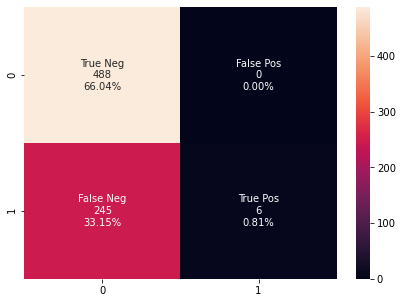

In [478]:
confusion_matrix5 = metrics.confusion_matrix(y_test_R, rf_y)
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names_d = ['True Neg','False Pos','False Neg','True Pos']
group_counts_d = ["{0:0.0f}".format(value) for value in
                confusion_matrix5.flatten()]
group_percentages_d = ["{0:.2%}".format(value) for value in
                     confusion_matrix5.flatten()/np.sum(confusion_matrix5)]
labels_d = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_d,group_counts_d,group_percentages_d)]
labels_d = np.asarray(labels_d).reshape(2,2)
sns.heatmap(confusion_matrix5, annot=labels_d, fmt='')

Text(0.5, 0, 'Feature Importance Random Forest')

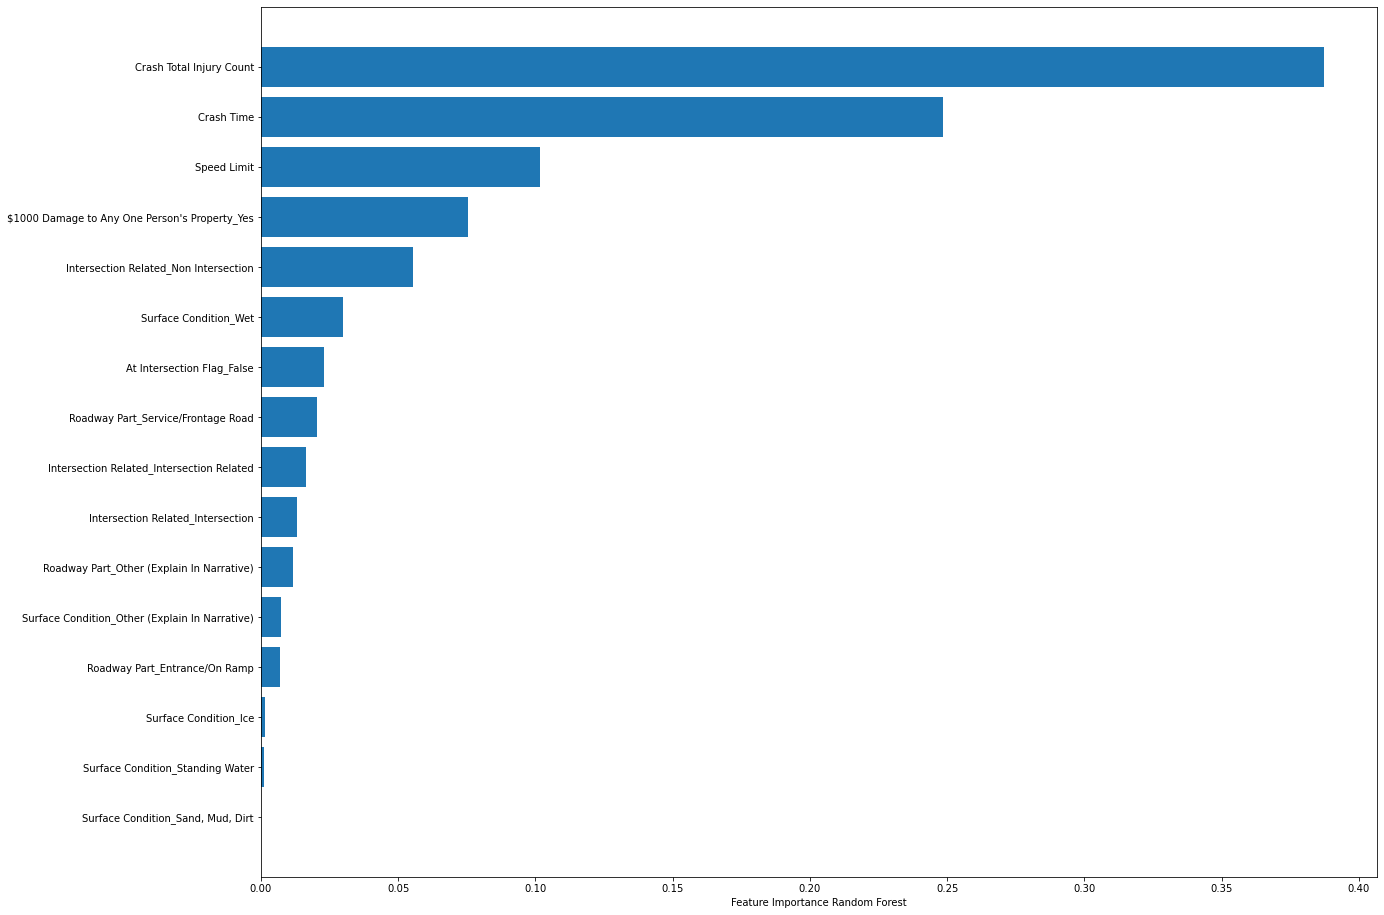

In [479]:
fig, ax = plt.subplots(figsize=(20,16))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train_R.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance Random Forest")

In [481]:
# Summarising all results 
modelResults = pd.DataFrame([['Logistic Regression', accuracy1,precision1,recall1, mse1, time1,aic1,falsepos1 ],
                       ['Logistic Regression with Forward Selection', accuracy2,precision2,recall2, mse2, time2,aic2, falsepos2],
                       ['Logistic Regression with Backward Selection', accuracy3,precision3,recall3, mse3, time3,aic3, falsepos3],
                       ['Decision Tree', accuracy4,precision4,recall4, mse4, time4,aic4, falsepos4],
                       ['Random forest', accuracy5,precision5,recall5, mse5, time5,aic5, falsepos5],],
                       columns=['Model', 'Accuracy %', 'Precision %', 'Recall %', 'MSE','Time (ms)','AIC', 'False Positives %'])
modelResults


,Model,Accuracy %,Precision %,Recall %,MSE,Time (ms),AIC,False Positives %
0,Logistic Regression,66.03,54.17,5.14,33.96,103.0,2189.0514,1.49
1,Logistic Regression with Forward Selection,66.58,63.64,5.53,33.42,42.5,2186.1764,1.08
2,Logistic Regression with Backward Selection,66.17,56.52,5.13,33.82,40.4,2354.2947,1.35
3,Decision Tree,66.71,100.00,2.77,33.29,14.4,NA,0.00
4,Random forest,66.84,100.00,2.39,33.15,7270.0,NA,0.00


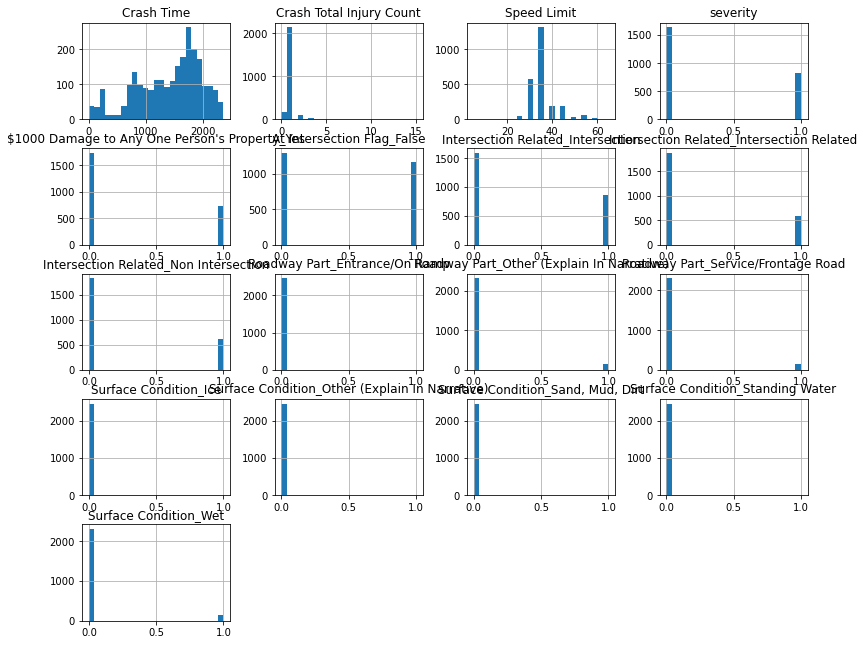

In [484]:
bikeCrash_wDummmy1.hist(figsize=(13,11),bins=25)
plt.show()